<a href="https://colab.research.google.com/github/PernasA/TP2_SOA/blob/master/HPC/Cuaderno_1_Martes_grupo6a_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 1. Introducción

El Ejercicio 1 del TP3 tiene como objetivo tomar una imagen como entrada, aplicarle el algoritmo escala de imagen, y mostrar la imagen transformada.

El algoritmo "Escala de Imagen" se encarga de reducir el tamaño de la imagen. Su funcionamiento consiste en que cada píxel de salida se reemplaza por su píxel más cercano en la entrada. Se redondean las coordenadas a su entero más cercano. 

Vamos a ejecutar el algoritmo de manera secuencial, haciendo uso de la CPU; y luego haciendo uso de la GPU, con CUDA, realizando una ejecución paralela mediante threads. Una vez ejecutada la función en ambos casos, se mostrará la imagen mediante un plot.

### 2. Armado del ambiente


In [ ]:
#INSTALACION DE BIBLIOTECA 'PYCUDA'#
!pip install pycuda

     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 66 kB 4.3 MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627577 sha256=6ac9a77f045c824d78396f31a341b72a12918de4cfd4f74316d960dc9327c330
  Stored in directory: /root/.cache/pip/wheels/c4/ef/49/dc6a5feb8d980b37c83d465ecab24949a6aa19458522a9e001
  Created wheel for pytools: filename=pytools-2021.2.9-py2.py3-none-any.whl size=62370 sha256=37f518d301729a2a116f1075cb9b234ed23e51c59c12847d2bec17ea48ef428b
  Stored in directory: /root/.cache/pip/wheels/41/b9/6e/94bb014f6484b15ec77e7877f3a227609481ffd98db364504d
Successfully built pycuda pytools


In [ ]:
!pip install validators

In [ ]:
 #@title Ingrese la url de una imagen:
import validators
url_imagen = "https://wallpaperaccess.com/full/4910986.jpg" #@param {type: "string" }

  #@markdown ---
  #@markdown ### seleccione la escala de imagen:
escala = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}
#Verificacion de que el usuario haya ingresado una URL de imagen valida
if(url_imagen == "" or not validators.url(url_imagen)):
  raise TypeError("Debe ingresar la url de una imagen.")

!wget {url_imagen} -O imagen.jpg

--2021-11-27 15:25:23--  https://wallpaperaccess.com/full/4910986.jpg
Resolving wallpaperaccess.com (wallpaperaccess.com)... 104.22.33.65, 172.67.7.204, 104.22.32.65, ...
Connecting to wallpaperaccess.com (wallpaperaccess.com)|104.22.33.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 670190 (654K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>] 654.48K  --.-KB/s    in 0.07s   

2021-11-27 15:25:24 (9.24 MB/s) - ‘imagen.jpg’ saved [670190/670190]



### 3. Desarrollo
# CPU


Tiempo total de ejecucion:  2707.7200000000003 [ms]
Tiempo de procesamiento en CPU:  2488.27 [ms]


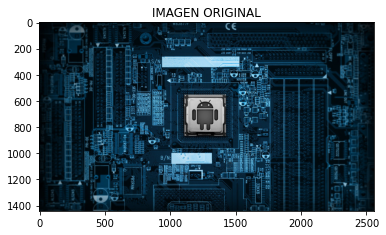

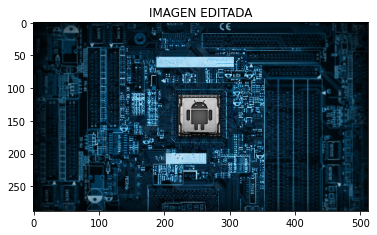

In [ ]:
try:
  #--------------------------------------BIBLIOTECAS--------------------------------------#
  import validators
  from PIL import Image
  import matplotlib.pyplot as plt
  from datetime import datetime
  import sys
  import numpy as np

  #-----------------------------------PARAMETRO IMAGEN------------------------------------#

  #Obtencion del tiempo inicial
  tiempo_total = datetime.now()

  #Declaracion de funcion que realiza el pasaje del tiempo obtenido mediante datetime.now(), a milisegundos.
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

  #---------------------------------------CODIGO--------------------------------------------#
  # Importación de la imagen y obtencion de sus dimensiones 
  imagen_normal = Image.open('imagen.jpg')
  width, height = imagen_normal.size

  #Ploteo de la imagen original
  plt.figure()
  plt.title("IMAGEN ORIGINAL")
  imgplot=plt.imshow( imagen_normal )

  # Creo una imagen vacia con los pixeles el ancho y el largo correspondiente
  #new_width, new_height = 340, 200
  
  new_width, new_height = int(width*escala), int(height*escala)
  imagen_con_escala_nueva = Image.new(imagen_normal.mode, (new_width, new_height), 'white')

  #Obtencion del tiempo previo a la ejecucion en GPU
  tiempo_imagen_cpu = datetime.now()

  # Declaro variables utiles para el algoritmo
  scale_x = new_width/width
  scale_y = new_height/height

  # Lleno cada pixel de la imagen creada
  for y in range(new_height):
      for x in range(new_width):
        x_nearest = int(np.round(x/scale_x))
        y_nearest = int(np.round(y/scale_y))
        pixel = imagen_normal.getpixel((x_nearest, y_nearest))
        imagen_con_escala_nueva.putpixel((x, y),  pixel)

  # Guardo la imagen
  imagen_con_escala_nueva.save('scaled_image.jpg')

  #Calculo del tiempo total de procesamiento de la imagen en GPU
  tiempo_imagen_cpu = datetime.now() - tiempo_imagen_cpu

  #Ploteo de la imagen resultado
  plt.figure()
  plt.title("IMAGEN EDITADA")
  imgplot=plt.imshow( imagen_con_escala_nueva )

  #Calculo del tiempo total de ejecucion del programa
  tiempo_total = datetime.now() - tiempo_total

  print("Tiempo total de ejecucion: ", tiempo_en_ms( tiempo_total ), "[ms]" )
  print("Tiempo de procesamiento en CPU: ", tiempo_en_ms( tiempo_imagen_cpu   ), "[ms]" )

except Exception as e:
  print("Error", e )
  sys.exit()

# GPU

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: UserWarning: The CUDA compiler succeeded, but said the following:
nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).



Imagen del filtro: imagen.jpg -RGB- [1440, 2560]
Thread: [ 32 , 19  ], Bloque : [ 45 , 135 ]
Total de Thread: [ 1440 , 2565  ]  =  3693600
Tiempo TOTAL:  954.75 [ms]
Tiempo GPU  :  1.618 [ms]


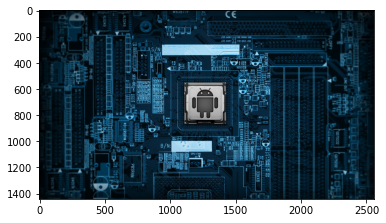

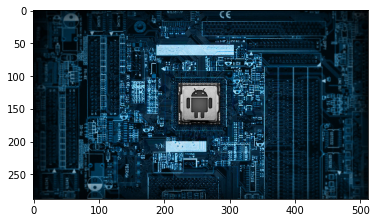

In [ ]:
try:
  #--------------------------------------BIBLIOTECAS--------------------------------------#

  from datetime import datetime

  #Obtencion del tiempo inicial
  tiempo_total = datetime.now()

  import validators
  import sys
  import numpy as numpy
  import matplotlib.pyplot as plt
  from PIL import Image
  import pycuda.driver as cuda
  import pycuda.autoinit
  from pycuda.compiler import SourceModule

  %matplotlib inline

  from datetime import datetime

  tiempo_total = datetime.now()

  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
  # --------------------------------------------

  img_nombre = 'imagen.jpg'
  image = Image.open( img_nombre ) 
    
  # summarize some details about the image 
  img_alto, img_ancho = image.size 

  # Convierto la imagen comprimida en JPEG/PNG a array
  img_O_cpu = numpy.asarray(image)
  img_R_cpu = numpy.empty_like( img_O_cpu)



  # Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
  img_O_gpu = cuda.mem_alloc( img_O_cpu.nbytes )
  img_R_gpu = cuda.mem_alloc( img_R_cpu.nbytes )
  # GPU - Copio la memoria al GPU.
  cuda.memcpy_htod( img_O_gpu, img_O_cpu )
  cuda.memcpy_htod( img_R_gpu, img_R_cpu )

  # CPU - Defino la función kernel que ejecutará en GPU.
  module = SourceModule("""
  __global__ void kernel_img( int ancho, int alto, float escala,
   char *img_O, char *img_R )
  {
    // Calculo las coordenadas del Thread en dos dimensiones.
    int idx = threadIdx.x + blockIdx.x*blockDim.x;
    int idy = threadIdx.y + blockIdx.y*blockDim.y;

    // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
    

    if(idx < ancho && idy < alto*escala)
    {

      // Calculo el color gris para el pixel a partir de los componentes.
      int aux=int(((idx+(idy*ancho)))/escala);
      img_R[(idx+(idy*ancho))*3  ]=img_O[aux*3];
      img_R[(((idx+(idy*ancho))*3)+1 ) ]=img_O[aux*3+1 ];
      img_R[(((idx+(idy*ancho))*3)+2)  ]=img_O[aux*3+2 ];
    }


  }
  """) 

  # Muestro los atributos de la imagen y como se ve antes del seudo filtro.
  print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

  # CPU - Genero la función kernel.
  kernel = module.get_function("kernel_img")

  tiempo_img = datetime.now()

  #Calculo de hilos y bloques
  dim_hilo_x = 32
  dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x )

  dim_hilo_y = 19
  dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

  print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
  print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

  tiempo_img = datetime.now()
  
  # GPU - Ejecuta el kernel.
  kernel( numpy.int32(img_ancho), numpy.int32(img_alto), 
         numpy.float32(escala),img_O_gpu, img_R_gpu, 
         block=( dim_hilo_x, dim_hilo_y, 1 ), 
         grid=(dim_bloque_x, dim_bloque_y,1) )


  tiempo_img = datetime.now() - tiempo_img

  # GPU - Copio el resultado desde la memoria GPU.
  cuda.memcpy_dtoh( img_R_cpu, img_R_gpu )

  # Muestro la imagen Original el filtro.
  plt.figure()
  imgplot=plt.imshow( img_O_cpu )

  # Muestro la imagen luego de aplicarle el filtro.
  plt.figure()
  imgplot=plt.imshow( img_R_cpu[0:int(img_ancho*escala) ,0:int(img_alto*escala)] )
  #imgplot=plt.imshow( img_R_cpu)

  tiempo_total = datetime.now() - tiempo_total

  print("Tiempo TOTAL: ", tiempo_en_ms( tiempo_total ), "[ms]" )
  print("Tiempo GPU  : ", tiempo_en_ms( tiempo_img ), "[ms]" )

except Exception as e:
  print("Error", e )
  sys.exit()


# 4. Métricas

Se realizaron las siguientes mediciones:

Tiempo GPU | Tiempo CPU 
-------------------|------------------
2.01 ms      | 1187,46 ms
0,24 ms       | 1280 ms
 0,344 ms     | 1246,72 ms	 
0,29 ms       | 1244 ms
0,27 ms       | 1280 ms
0,26 ms       | 1252,26 ms
0,26 ms       | 1240,88 ms
0,25 ms       | 1248,30 ms
0,27 ms       | 1271 ms
0,26 ms       | 1262 ms

Tiempo promedio GPU |	Tiempo promedio CPU
-------------------|------------------
0.44 ms | 1251 ms

# 5. Conclusiones

Observando las metricas, podemos concluir que el procesamiento de la imagen en GPU se realiza más rapido que en CPU, en promedio 2.840 veces más rapido. Esto se debe a que en GPU se realizan operaciones de manera paralela mientras que en CPU se realizan las operaciones de manera secuencial. En cuanto a la eficacia del algortimo, en CPU es mayor que en GPU debido a la disminucion de la precision de los valores de los pixeles. Se podria mejorar la eficacia del filtro en GPU utilizando distintas dimensiones y valores en la matriz kernel. También, es más dificil de implementar el algoritmo en GPU.

# 6. Bibliografía

[1] Algoritmo de escala - Towards data science: https://towardsdatascience.com/image-processing-image-scaling-algorithms-ae29aaa6b36c

[2] Algoritmo de escala: -OpenCV: https://docs.opencv.org/4.4.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d


[3] Cuda - Documentación Oficial Nvidia:  https://docs.nvidia.com/cuda/

[4] Python basico UNLaM: https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb
